In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [28]:
data = pd.read_csv(r"boston_house_prices.csv", header=1)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [32]:
x = data.drop(['MEDV'], axis=1)
y = data['MEDV']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (404, 13)
X_test: (102, 13)
y_train: (404,)
y_test: (102,)


In [70]:
train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.5100,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.4470,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.6090,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.4130,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.7130,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,5.29305,0.0,18.10,0,0.7000,6.051,82.5,2.1678,24,666,20.2,378.38,18.76,23.2
206,0.22969,0.0,10.59,0,0.4890,6.326,52.5,4.3549,4,277,18.6,394.87,10.97,24.4
282,0.06129,20.0,3.33,1,0.4429,7.645,49.7,5.2119,5,216,14.9,377.07,3.01,46.0
254,0.04819,80.0,3.64,0,0.3920,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9


In [71]:
l_r = 0.005
n_it = 501

In [72]:
model = LinearRegression()

In [73]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
y_pred = model.predict(x_test)
y_pred[:10]

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597])

In [78]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

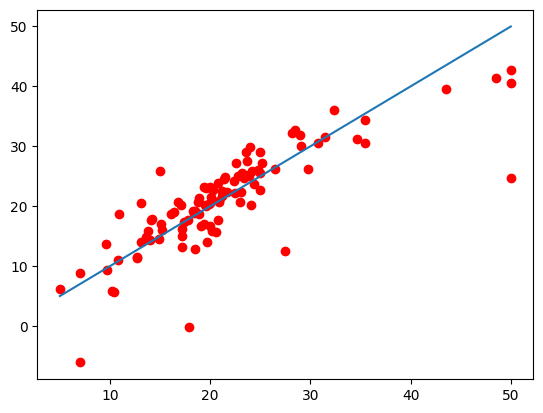

In [91]:
plt.scatter(y_test, y_pred, color="red");
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()]);